In [1]:
import pandas as pd

In [3]:
Fake_News_Data = pd.read_csv('Fake_News_Data.csv')

In [5]:
Fake_News_Data = Fake_News_Data.iloc[ : , 1: ]

In [14]:
Fake_News_Data = Fake_News_Data.rename(columns={'label': 'fake'})

Dataset contains three columns: Title (about the text news heading); Text (about the news content); and fake (0 = yes and 1 = no)

In [25]:
Fake_News_Data.head()

,title,text,fake
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [22]:
Fake_News_Data['fake'] = Fake_News_Data['fake'].astype('category')

In [23]:
Fake_News_Data.dtypes

title      object
text       object
fake     category
dtype: object

In [24]:
Fake_News_Data.describe(include='all')

,title,text,fake
count,71576,72095,72134
unique,62347,62718,2
top,Factbox: Trump fills top jobs for his administ...,,1
freq,14,738,37106


In [27]:
Fake_News_Data.shape

(72134, 3)

In [26]:
Fake_News_Data.isnull().sum()

title    558
text      39
fake       0
dtype: int64

In [58]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,7)})

In [47]:
prop_Fake_yes = len( Fake_News_Data.loc[ Fake_News_Data['fake']== '0' , :] ) / len(Fake_News_Data)

prop_Fake_no = len( Fake_News_Data.loc[ Fake_News_Data['fake']== '1' , :] ) / len(Fake_News_Data)

In [50]:
Fake_News_Data['proportion_Fakes'] = 0


for i in range(0, len(Fake_News_Data)):

    if Fake_News_Data['fake'][i] == 0 :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_yes

    else :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17328\594284076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no


[Text(0.5, 0, 'Fakes'), Text(0, 0.5, 'proportion')]

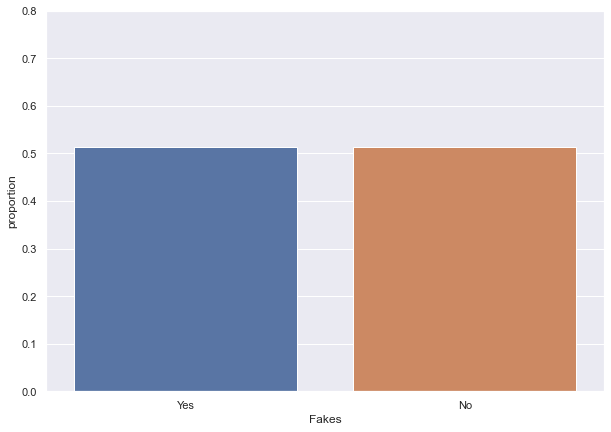

In [59]:
p1 = sns.barplot(x='fake', y='proportion_Fakes', data=Fake_News_Data) 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['Yes', 'No'])
p1.axes.set(xlabel='Fakes', ylabel='proportion')